# Setup:

1. Download: https://tinyurl.com/umg-py
2. Log in with student account: jupyter.gwdg.de
3. Drag and drop downloaded file.

# Jupyter Notebook basics:

* One input area is called "cell"
* Cells can be code or text....
* Use Ctrl+Enter (or Shift+Enter) to execute a cell
* Code will "see" everything that ran earlier

## Room for some trials:

### NumPy

1. One of the most basic modules used for scientific work
2. Defines N-Dimensional "arrays" with same typed data
3. Fast calculation
4. Convenient for much work

In [1]:
# "import" the tools provided by numpy
# ``as np`` gives it a name and is convention

import numpy as np

### Creating simple arrays:

In [2]:
# Manual creation:
np.array([[2, 3, 4, 1, 5],
          [6, 7, 8, 9, 3]])

array([[2, 3, 4, 1, 5],
       [6, 7, 8, 9, 3]])

In [3]:
# Integer numbers from zero to 20 (not inclusive)
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
# "Floating point" numbers from 0 to 1 in 11 steps:
np.linspace(0, 1, 11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

##### Excercise:

1. Create the numbers from 100 to 200 in every 20 steps
2. Create the same numbers using linspace (as floating point)

###### There are many more helpers, such as:

``zeros``, ``ones``, ``full``, ….

or ``meshgrid`` for higher dimensional arrays (and many more)

### We can also pick elements, etc.:

In [5]:
arr = np.arange(20).reshape(5, 4)
print(arr)
print("First row:")
print(arr[0])
print("A single element:")
print(arr[0, 1])
print("A small chunk:")
print(arr[:2, :2])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
First row:
[0 1 2 3]
A single element:
1
A small chunk:
[[0 1]
 [4 5]]


In [6]:
# Even much more complex:
print(arr[[1, 2, 3]])
print()
print(arr[arr > 5])

[[ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19]


#### Math is done for every element

In [7]:
arr1 = np.ones(10)
arr2 = np.arange(10)

print("arr1:", arr1)
print("arr2:", arr2)
print("Sum of both:", arr1 + arr2)

arr1: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
arr2: [0 1 2 3 4 5 6 7 8 9]
Sum of both: [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [8]:
# But shapes have to match:
arr3 = np.arange(9)

arr1 + arr3

ValueError: operands could not be broadcast together with shapes (10,) (9,) 

#### Broadcasting?!

If array shapes do not match, they can still be similar enough.

In the simplest case a single number can be added to an array:

In [9]:
arr3 + 10000

array([10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008])

###  Sums, Standard deviation, etc.

In [10]:
print(arr3)

print("The sum of arr3 is:", np.sum(arr3))
print("The sum of arr3 is:", arr3.sum())

[0 1 2 3 4 5 6 7 8]
The sum of arr3 is: 36
The sum of arr3 is: 36


In [11]:
print("The Standard devitation is:", np.std(arr3))

The Standard devitation is: 2.58198889747


#### And many more....

### Numpy also includes things such as:

* Fourier Transform
* Linear algebra tools
* Random number generation

# Plotting with matplotlib (and more math)

In [12]:
# Special command for this Notebook (not python)
# necessary to set up plotting nicely:
%matplotlib notebook 

In [13]:
# Something to plot:

x = np.linspace(0, 5*np.pi, num=1000)
y = np.sin(x)

In [14]:
# pyplot is a convenient way for most plots.
# The convention is to use "plt"
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


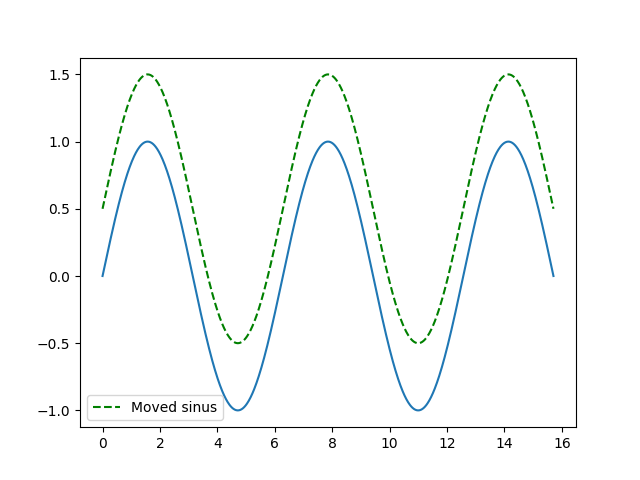

In [15]:
# Create a new figure:
plt.figure()

# And plot something:
plt.plot(x, y)

In [16]:
# Lets modify the figure:
plt.plot(x, y+0.5, linestyle="--", color="green",
         label="Moved sinus")
# And add a legend:
plt.legend(loc="best")

# Matplotlib can plot almost anything:

The gallery is a great way to find out how to plot something:

https://matplotlib.org/gallery.html

# SciPy

* Basic package providing many scientific tools
* There are **many** more (domain specific) projects
   - Always look if someone else solved your problem!

Includes:

- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Compressed Sparse Graph Routines (scipy.sparse.csgraph)
- Spatial data structures and algorithms (scipy.spatial)
- Statistics (scipy.stats)
- Multidimensional image processing (scipy.ndimage)
- File IO (scipy.io)
- And more…

# The Roesler Attractor:

* Define functions
* Use numpy for basic things
* SciPy to integrate
* Matplotlib to visualize the result

In [17]:
# (imports not actually needed, but a typical start):

import numpy as np
# Integration:
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# and three dimensional plotting (gallery!)
from mpl_toolkits.mplot3d import Axes3D

In [18]:
def roessler(state_variables, t=None, a=0.1, b=0.1, c=13.):
    """
    The Roessler Attractor derivatives
    
    Parameters
    ----------
    state_variables : ndarray
        The state of the system (3 Dimensions)
    t : float or None
        The simulation time (unused, only for ``odeint``)
    a : float
        Parameter `a`, defaults to 0.1.
    b : float
        Parameter `b`, defaults to 0.1.
    c : float
        Parameter `c`, defaults to 13.
    """
    x = state_variables[0]
    y = state_variables[1]
    z = state_variables[2]
    
    dx = - y - z
    dy = x + a * y
    dz = b + z * (x - c)
    
    return np.array([dx, dy, dz])

In [19]:
# Lets integrate it! :)

times = np.linspace(0, 200, 10001)
print(times)
start_value = np.array([10, 10, 10])
# odeint has a lot of options, if you use it more, read the help:
result = odeint(roessler, start_value, times)

[  0.00000000e+00   2.00000000e-02   4.00000000e-02 ...,   1.99960000e+02
   1.99980000e+02   2.00000000e+02]


In [20]:
print("The result is an Nx3 Array, lets plot it:")
print(result.shape)

The result is an Nx3 Array, lets plot it:
(10001, 3)


<IPython.core.display.Javascript object>


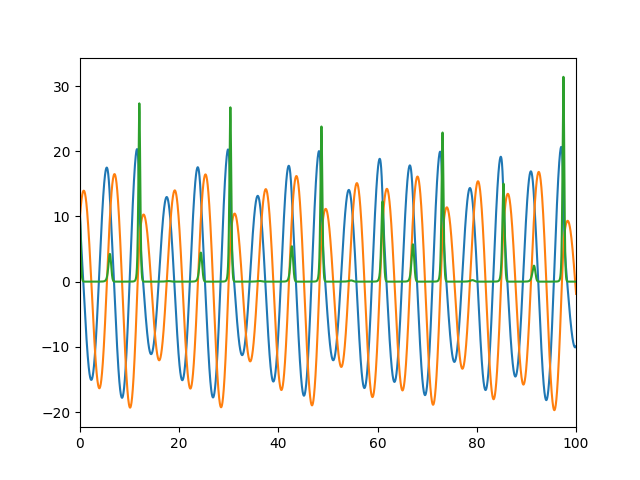

(0, 100)

In [21]:
# Plot one dimensional (only the start):
plt.figure()

plt.plot(times, result[:, 0], label="x")
plt.plot(times, result[:, 1], label="y")
plt.plot(times, result[:, 2], label="z")

plt.xlim(0, 100)

<IPython.core.display.Javascript object>


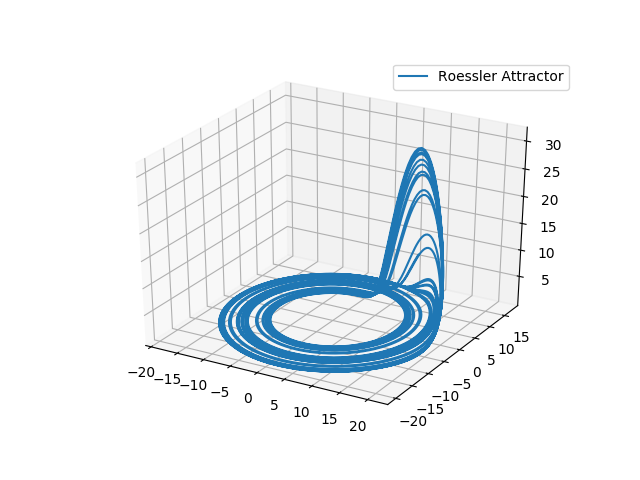

In [22]:
# Plotting much like: https://matplotlib.org/examples/mplot3d/lines3d_demo.html

fig = plt.figure()
# We use ax instead of "plt" here, plotting directly into the axis object
# which is basically one plotting area>
ax = fig.gca(projection='3d')

ax.plot(result[:, 0], result[:, 1], result[:, 2], label='Roessler Attractor')
ax.legend()

plt.show()

In [23]:
# Delay embedding shows the attractor as well:

fig = plt.figure()
ax = fig.gca(projection='3d')

# 50 is one time unit:
ax.plot(result[100:, 0], result[50:-50, 0], result[:-100, 0], label='Roessler Attractor',
        linewidth=0.5)
ax.legend()

ax.set_xlabel("x(t + 2)")
ax.set_ylabel("x(t + 1)")
ax.set_zlabel("x(t)")

plt.show()

<IPython.core.display.Javascript object>

# Exercise: Create a ``lorenz`` function, solve it and plot it

The model equations are:

<math> \begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= \sigma (y - x), \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= x (\rho - z) - y, \\
\frac{\mathrm{d}z}{\mathrm{d}t} &= x y - \beta z. 
\end{align} </math>

With $\sigma = 10$, $\beta=8/3$, and  $\rho = 28$ leading to chaos.

In [ ]:
def lorenz(model_variables, time=None, sigma=10, beta=8./3, rho=28):
    # Calculate dx, dy, dz considering that model_variables are x, y and z:
    
    # <Insert your code here!>
    
    return np.array([dx, dy, dz])


times = np.linspace(0, 50, 1001)
start_value = np.array([10, 10, 10])
# odeint has a lot of options, if you use it more, read the help:
result = odeint(lorenz, start_value, times)

plt.figure()
plt.plot(times, result[:, 0], label="x-Variable")
# Add labels to the plot:

# Create a 3D plot!

## Final notes:

1. There are many good tools, use them!
  - Within and outside of numpy/scipy/matplotlib
  - E.g.: ``pandas`` for data analysis (things you might do in excel)
2. There are some pitfalls
  - do not get frustrated
  - read errors carefully
  - google and ask for help
3. Books/Learning Material:
  - http://www.scipy-lectures.org
  - Previous course with excercises (with solutions) for self lerners: https://github.com/MPIDS/Python-Course 
  - Speed optimization focused: http://www.labri.fr/perso/nrougier/from-python-to-numpy/
  - Easy to very tricky numpy snipplets http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html
4. Quick cardiac example:
  - https://gitlab.gwdg.de/sberg/scientific-python-intro/blob/master/Mitchell-Schaefer.ipynb
  
##### Exercises if you are bored:

https://github.com/MPIDS/Python-Course/blob/master/03-numpy-scipy/exercises/exercises.ipynb